## Question 3
### (a)


In [9]:
def Rosenbrock(X):
    x,y=X
    return (1-x)**2+10*(y-x**2)**2

def Rosenbrock_grad(X):
    x,y=X
    dx=2*(x-1)+20*(y-x**2)*(-2*x)
    dy=20*(y-x**2)
    return np.array([dx,dy])

In [10]:
original_point=np.array([-0.5,1.5])
res=steepest_descent(Rosenbrock,Rosenbrock_grad,original_point,0.1,1e-5)

func:'steepest_descent' took: 0.0408 sec


1204


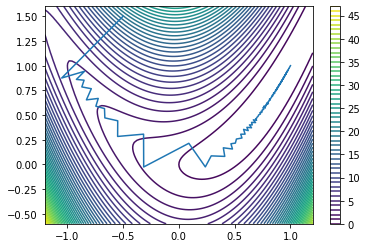

In [11]:
draw_path(Rosenbrock,np.array(res['path']),-1.2,1.2,-0.6,1.6)
print(len(res['path']))

### (b)


In [12]:
@timeit
def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=0):
    deriv=first_derivate(starting_point)
    count=0
    visited=[]
    while LA.norm(deriv)>tol and count<1e5:
        if stochastic_injection>0:
            random_vector=np.random.random(len(starting_point))*2-1
            stochastic_deriv=LA.norm(deriv)*random_vector/LA.norm(random_vector)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        new_point=starting_point+stepsize*(direction)

        if func(new_point)<func(starting_point):
            visited.append(starting_point)
            starting_point=new_point
            deriv=first_derivate(starting_point)
            stepsize*=1.2
            count+=1
            
        else:
            stepsize/=2
            count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

In [13]:
original_point=np.array([-0.5,1.5])
res=stochastic_gradient_descent(Rosenbrock,Rosenbrock_grad,original_point,0.1,1e-5,1)

func:'stochastic_gradient_descent' took: 0.1088 sec


In [14]:
print(len(res['path']))

1992


### (c)

In [15]:
res=minimize(Rosenbrock,original_point,method='CG',jac=Rosenbrock_grad,options={"gtol":1e-5,"disp":True})
print(res.x)
res=minimize(Rosenbrock,original_point,method='BFGS',jac=Rosenbrock_grad,options={"gtol":1e-5,"disp":True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 42
         Gradient evaluations: 42
[0.99999976 0.99999951]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 31
         Gradient evaluations: 31
[1.00000004 1.00000009]


Using stochastic gradient descent leads to convergence in ~1100 steps in this run, much worse than CG (42 steps) and BFGS (31 steps).

### (d)
No. Due to the stochastic essence of the algorithm, its performance should be described by the statistical average. The performace by running the algorithm only once cannot represent its expected performance.

### (e)
Run the algorithm multiple times (say 10), and evaluate based on the statistics for these stochastic algorithms

In [16]:
def statistics_test(method,args,times,global_minimum=None):
    result=[]
    for n in range(times):
        res=method(*args)
        if global_minimum is not None and LA.norm(res['x']-global_minimum)>1e-3:
            continue
        result.append(len(res['path']))
    if len(result)>0:
        avg=np.average(result)
        var=np.std(result)
        print("Running %d times: reach global minimum %d times, average %d steps with variance %f"%(times,len(result),avg,var))
    else:
        print("Running %d times: reach global minimum %d times"%(times,0))

In [17]:
starting_points = [original_point,[0,1],[-1,1],[1.5,0.5]]
for pt in starting_points:
    statistics_test(stochastic_gradient_descent,[Rosenbrock,Rosenbrock_grad,pt,0.1,1e-5,1],10)

func:'stochastic_gradient_descent' took: 0.1071 sec
func:'stochastic_gradient_descent' took: 0.1038 sec
func:'stochastic_gradient_descent' took: 0.1001 sec
func:'stochastic_gradient_descent' took: 0.0903 sec
func:'stochastic_gradient_descent' took: 0.0974 sec
func:'stochastic_gradient_descent' took: 0.0900 sec
func:'stochastic_gradient_descent' took: 0.1089 sec
func:'stochastic_gradient_descent' took: 0.0990 sec
func:'stochastic_gradient_descent' took: 0.0773 sec
func:'stochastic_gradient_descent' took: 0.0944 sec
Running 10 times: reach global minimum 10 times, average 1739 steps with variance 49.448964
func:'stochastic_gradient_descent' took: 0.0992 sec
func:'stochastic_gradient_descent' took: 0.0781 sec
func:'stochastic_gradient_descent' took: 0.1125 sec
func:'stochastic_gradient_descent' took: 0.0907 sec
func:'stochastic_gradient_descent' took: 0.0847 sec
func:'stochastic_gradient_descent' took: 0.0921 sec
func:'stochastic_gradient_descent' took: 0.0816 sec
func:'stochastic_gradien

In [18]:
for pt in starting_points:
    statistics_test(steepest_descent,[Rosenbrock,Rosenbrock_grad,pt,0.1,1e-5],10)

func:'steepest_descent' took: 0.0310 sec
func:'steepest_descent' took: 0.0282 sec
func:'steepest_descent' took: 0.0286 sec
func:'steepest_descent' took: 0.0272 sec
func:'steepest_descent' took: 0.0245 sec
func:'steepest_descent' took: 0.0272 sec
func:'steepest_descent' took: 0.0266 sec
func:'steepest_descent' took: 0.0273 sec
func:'steepest_descent' took: 0.0277 sec
func:'steepest_descent' took: 0.0288 sec
Running 10 times: reach global minimum 10 times, average 1204 steps with variance 0.000000
func:'steepest_descent' took: 0.0293 sec
func:'steepest_descent' took: 0.0275 sec
func:'steepest_descent' took: 0.0288 sec
func:'steepest_descent' took: 0.0241 sec
func:'steepest_descent' took: 0.0266 sec
func:'steepest_descent' took: 0.0272 sec
func:'steepest_descent' took: 0.0297 sec
func:'steepest_descent' took: 0.0272 sec
func:'steepest_descent' took: 0.0290 sec
func:'steepest_descent' took: 0.0275 sec
Running 10 times: reach global minimum 10 times, average 1204 steps with variance 0.00000

In [19]:
for pt in starting_points:
    res=minimize(Rosenbrock,pt,method='CG',jac=Rosenbrock_grad,options={"gtol":1e-5,"disp":True})
    print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 42
         Gradient evaluations: 42
[0.99999976 0.99999951]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 33
         Gradient evaluations: 33
[1. 1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 29
         Gradient evaluations: 29
[1. 1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 27
         Gradient evaluations: 26
[0.9999954  0.99999059]


In [20]:
for pt in starting_points:
    res=minimize(Rosenbrock,pt,method='BFGS',jac=Rosenbrock_grad,options={"gtol":1e-5,"disp":True})
    print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 31
         Gradient evaluations: 31
[1.00000004 1.00000009]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
[1.00000012 1.00000021]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 27
         Gradient evaluations: 27
[1. 1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22
[1.00000064 1.00000124]


The minimization of Rosenbrock banana function is pretty slow while using SD or SGD, but pretty fast using CG or BFGS, because by using SG alone, the path towards the minimum will be very zig-zag due to its narrow valley on the surface. Stochastic method shows variance in performance due to the randomness added to the direction, while other methods have fixed optimization pathway for a given starting point.

### Question 4

Three-Hump Camel function
$f(x,y)=2x^2-1.05x^4+x^6/6+xy+y^2$

In [21]:
def Camel(X):
    x,y=X
    return 2*x**2-1.05*x**4+x**6/6+x*y+y**2

def Camel_grad(X):
    x,y=X
    dx=4*x-4*1.05*x**3+x**5+y
    dy=x+2*y
    return np.array([dx,dy])

### (a)

In [22]:
original_point=np.array([-1.5,-1.5])
statistics_test(stochastic_gradient_descent,[Camel,Camel_grad,original_point,0.1,1e-5,1],20,np.array([0,0]))

func:'stochastic_gradient_descent' took: 0.0033 sec
func:'stochastic_gradient_descent' took: 0.0034 sec
func:'stochastic_gradient_descent' took: 0.0061 sec
func:'stochastic_gradient_descent' took: 0.0017 sec
func:'stochastic_gradient_descent' took: 0.0024 sec
func:'stochastic_gradient_descent' took: 0.0047 sec
func:'stochastic_gradient_descent' took: 0.0033 sec
func:'stochastic_gradient_descent' took: 0.0025 sec
func:'stochastic_gradient_descent' took: 0.0029 sec
func:'stochastic_gradient_descent' took: 0.0021 sec
func:'stochastic_gradient_descent' took: 0.0030 sec
func:'stochastic_gradient_descent' took: 0.0015 sec
func:'stochastic_gradient_descent' took: 0.0031 sec
func:'stochastic_gradient_descent' took: 0.0029 sec
func:'stochastic_gradient_descent' took: 0.0040 sec
func:'stochastic_gradient_descent' took: 0.0027 sec
func:'stochastic_gradient_descent' took: 0.0023 sec
func:'stochastic_gradient_descent' took: 0.0033 sec
func:'stochastic_gradient_descent' took: 0.0029 sec
func:'stocha

In [23]:
from scipy.optimize import minimize
res=minimize(Camel,original_point,method='BFGS',jac=Camel_grad,options={"gtol":1e-5,"disp":True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
[-1.74755233  0.87377616]


In [24]:
res=minimize(Camel,original_point,method='CG',jac=Camel_grad,options={"gtol":1e-5,"disp":True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 7
         Function evaluations: 21
         Gradient evaluations: 21
[-1.74755166  0.8737762 ]


func:'stochastic_gradient_descent' took: 0.0025 sec


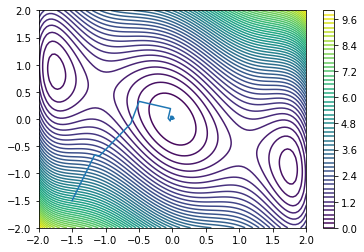

In [25]:
res=stochastic_gradient_descent(Camel,Camel_grad,original_point,0.1,1e-5,1)
draw_path(Camel,np.asarray(res['path']))

For this function and the starting point $(-1.5,-1.5)$, GD, BFGS and CG will all converge to a local minimum $(-1.74,0.87)$ but SGD have a high chance converging to the global minimum $(0,0)$, which illustrates SGD's potential for finding global minimum.

### (b)

In [ ]:
@timeit
def SGDM(func,first_derivate,starting_point,stepsize,momentum=0,tol=1e-5,stochastic_injection=0):
    deriv=first_derivate(starting_point)
    count=0
    visited=[]
    previous_direction=np.zeros(len(starting_point))
    while LA.norm(deriv)>tol and count<1e5:
        if stochastic_injection>0:
            random_vector=np.random.random(len(starting_point))*2-1
            stochastic_deriv=LA.norm(deriv)*random_vector/LA.norm(random_vector)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        new_point=starting_point+stepsize*(momentum*previous_direction+direction)

        if func(new_point)<func(starting_point):
            visited.append(starting_point)
            starting_point=new_point
            previous_direction=direction+momentum*previous_direction
            deriv=first_derivate(starting_point)
            stepsize*=1.2
            count+=1
            
        else:
            if stepsize<1e-5:
                previous_direction=previous_direction-previous_direction
            else:
                stepsize/=2
            count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

func:'SGDM' took: 0.0153 sec
234


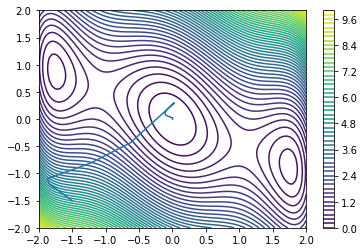

In [30]:
res=SGDM(Camel,Camel_grad,original_point,0.1,0.9,1e-5,1)
draw_path(Camel,res['path'])
print(len(res['path']))

In [31]:
statistics_test(SGDM,[Camel,Camel_grad,original_point,0.1,0.9,1e-5,1],20,np.array([0,0]))

func:'SGDM' took: 0.0162 sec
func:'SGDM' took: 0.0167 sec
func:'SGDM' took: 0.0153 sec
func:'SGDM' took: 0.0164 sec
func:'SGDM' took: 0.0167 sec
func:'SGDM' took: 0.0157 sec
func:'SGDM' took: 0.0127 sec
func:'SGDM' took: 0.0108 sec
func:'SGDM' took: 0.0157 sec
func:'SGDM' took: 0.0133 sec
func:'SGDM' took: 0.0107 sec
func:'SGDM' took: 0.0096 sec
func:'SGDM' took: 0.0149 sec
func:'SGDM' took: 0.0119 sec
func:'SGDM' took: 0.0140 sec
func:'SGDM' took: 0.0154 sec
func:'SGDM' took: 0.0086 sec
func:'SGDM' took: 0.0175 sec
func:'SGDM' took: 0.0166 sec
func:'SGDM' took: 0.0183 sec
Running 20 times: reach global minimum 10 times, average 265 steps with variance 23.051247


SGDM still has a high chance converging to global minimum in this case. However, in this example SGDM does not perform as good as SGD. It will depend on the function and the starting point, and SGDM might be better than SGD in functions with shallow valley surfaces.

